In [1]:
#%%

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
import stanza
import pandas as pd 
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 2000
pd.options.display.max_colwidth = 2000



import sentiment_score as ss
import importlib
#%%


import re


C:\Users\benan\AppData\Roaming\Python\Python37\site-packages\huggingface_hub\snapshot_download.py:11: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  FutureWarning,
C:\Users\benan\AppData\Roaming\Python\Python37\site-packages\huggingface_hub\file_download.py:591: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


In [2]:

nlp = stanza.Pipeline('en', processors='tokenize,pos')
def clean_text(lor):
    lor = re.sub(r"\n"," ",lor)
    lor = re.sub(r"\"","",lor)
    lor = re.sub(r"/","",lor)
    lor = re.sub(r"\(","",lor)
    lor = re.sub(r"\)","",lor)
    lor = re.sub(r"\s+"," ",lor)
    return lor


def tokenize_sentences(text):
    sentence_list = sent_tokenize(text)
    return sentence_list

def insert_space(text):
    new_text = re.sub(r"([a-zA-Z\)]\.)(\w)", r"\1 \2", text, count=50)
    new_text = re.sub(r"([0-9]\.)([A-Z]+)", r"\1 \2", new_text, count=20)
    new_text = re.sub(
        r"(?:(^[0-9]\.|^\s[0-9]\.))([a-zA-Z]+)", r"\1 \2", new_text, count=20
    )
    new_text = re.sub(r"(?:(^[0-9]\s|^\s[0-9]\s))", r"", new_text, count=20)
    new_text = re.sub(r"(?:\s[0-9]\.\s|^[0-9]\.\s)", r" ", new_text, count=20)
    new_text = new_text.lstrip().rstrip()
    return new_text


def get_df_sentence(df, column_name):
    df[column_name] = df[column_name].astype("string")
    df[column_name] = df[column_name].apply(insert_space)
    sentences = df[column_name].apply(tokenize_sentences)
    df_sentence = pd.DataFrame(sentences.tolist(), index=df.lor_id).stack()
    df_sentence = df_sentence.reset_index()[[0, "lor_id"]]
    df_sentence.columns = ["sentence_split", "lor_id"]
    df_sentence["sentence_split"] = df_sentence["sentence_split"].map(
        lambda x: x.lstrip(".").rstrip(".")
    )
    df_sentence["sentence_split"] = df_sentence["sentence_split"].apply(str.lower)
    return df_sentence



2022-12-30 09:03:26 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-12-30 09:03:26 INFO: Use device: cpu
2022-12-30 09:03:26 INFO: Loading: tokenize
2022-12-30 09:03:26 INFO: Loading: pos
2022-12-30 09:03:26 INFO: Done loading processors!


In [7]:



# df1  = pd.read_excel("./Data/alperen_100.xlsx")
# df2  = pd.read_excel("./Data/Master.xlsx")
# df3  = pd.read_excel("./Data/RESEARCH -taranan.xlsx")
# df4  = pd.read_excel("./Data/data_4.xlsx")
# df5  = pd.read_excel("./Data/reference letter project updated20.09.2022.xlsx")


df = pd.concat([df1,df2,df3,df4,df5],axis=0)



In [10]:
df_foreign =  pd.read_excel("./df_master.xlsx")

In [3]:
def preprocess_medical(df_):
    df = df_.copy()
    df["medical_school"] = df["medical_school"].str.lower()
    df["medical_school"] = df["medical_school"].str.strip()
    df["medical_school"] = df["medical_school"].str.replace(r"\s+",(r" "))
    df["medical_school"] = df["medical_school"].str.replace(r"[^\w\s]",(r""))
    df["medical_school"] = df["medical_school"].str.replace(r"\s+",(r" "))
    df["medical_school"] = df["medical_school"].str.strip()
    
    return df

In [11]:
df_foreign = preprocess_medical(df_foreign)

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [12]:
foreign_dic_1 = df_foreign.groupby("medical_school")['foreign'].apply(list).apply(lambda x:x[0]).to_dict()

In [4]:
df1  = pd.read_excel("./Data/alperen.xlsx")
df2  = pd.read_excel("./Data/sude.xlsx")


df = pd.concat([df1,df2],axis=0)

In [5]:
df = df.dropna(subset = ["lor1"])
df = df[~df.duplicated(subset = ["lor1"])]
df = df.reset_index()
df["applicant_id"] = df.index


In [190]:
df.shape

(336, 46)

In [6]:
df = preprocess_medical(df)

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [136]:
df.columns

Index(['index', 'applicant_id', 'application_year', 'birth_year',
       'citizenship', 'medical_school', 'residency_school', 'md_year',
       'residency_year', 'step1', 'step2', 'step3', 'step_old', 'IMG',
       'class_rank', 'honors', 'received_offer', 'language_skills',
       'interests', 'number_of_publications', 'speciality', 'gender', 'lor1',
       'lor1_position', 'lor1_university', 'lor1_gender', 'lor2',
       'lor2_position', 'lor2_university', 'lor2_gender', 'lor3',
       'lor3_position', 'lor3_university', 'lor3_gender', 'lor4',
       'lor4_position', 'lor4_university', 'lor4_gender', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [13]:
foreign = []
for school in df["medical_school"]:
    if pd.isna(school):
        foreign.append("empty")
    elif school in foreign_dic_1.keys():
        
        foreign.append(foreign_dic_1[school])
    else:
        print(school)
        foreign.append("unk")

university of kansas school of medicine
padmashree dr dy patil medical college
morehouse school of medicine
university of california san francisco
saint james school of medicine
nova southeastern university
rush university medical college
university of lisbon faculty of medicine
gandhi medical college bhopal india
chicago medical school at rosalind franklin university of medicine science
mercer university school of medicine
case western reserve university
columbia university
shifa college of medicine
india institue of medical center
sackler school of medicine
menofia university school of medicine
chicago college of osteopathic medicine
marshall university school of medicine
loyola university
stanford university school of medicine
trakya university medical school
hacettepe uni medical school
siddhartha medical college
national university of science technology
smt nhl municipal medical college
midwestern university chicago college of osteopathic
chicago medical school at rosalind frankli

In [14]:
df["foreign"] = foreign

In [15]:
df.loc[df["foreign"] == "unk","medical_school"]

143                                       university of kansas school of medicine
145                                        padmashree dr dy patil medical college
146                                                  morehouse school of medicine
147                                        university of california san francisco
148                                                saint james school of medicine
149                                                  nova southeastern university
150                                               rush university medical college
152                                      university of lisbon faculty of medicine
153                                           gandhi medical college bhopal india
155    chicago medical school at rosalind franklin university of medicine science
156                                          mercer university school of medicine
157                                               case western reserve university
158             

In [16]:
foreign_dic_2 = {
    "university of kansas school of medicine" : 0,
"padmashree dr dy patil medical college":1,
"morehouse school of medicine":0,
"university of california san francisco":0,
"saint james school of medicine":1,
"nova southeastern university":0,
"rush university medical college":0,
"university of lisbon faculty of medicine":1,
"gandhi medical college bhopal india":1,
"chicago medical school at rosalind franklin university of medicine science":0,
"mercer university school of medicine":0,
"case western reserve university":0,
"columbia university":0,
"shifa college of medicine":1,
"india institue of medical center":1,
"sackler school of medicine":1,
"menofia university school of medicine":1,
"chicago college of osteopathic medicine":0,
"marshall university school of medicine":0,
"loyola university":0,
"stanford university school of medicine":0,
"trakya university medical school":1,
"hacettepe uni medical school":1,
"siddhartha medical college":1,
"national university of science technology":1,
"smt nhl municipal medical college":1,
"midwestern university chicago college of osteopathic":0,
"chicago medical school at rosalind franklin univ":0,
"university of south carolina school of medicine":0,
"louisiana state university health sciences center shreveport":0}


In [17]:
foreign_dic_1.update(foreign_dic_2)

In [142]:
pd.DataFrame(foreign_dic_1,index = [0]).T.to_excel("foreign_schools.xlsx")

In [18]:
import joblib
#joblib.dump(foreign_dic_1,"foreign_dic.pkl")
foreign_dic_1 = joblib.load("foreign_dic.pkl")

In [19]:
foreign = []
for school in df["medical_school"]:
    if pd.isna(school):
        foreign.append("empty")
    elif school in foreign_dic_1.keys():
        
        foreign.append(foreign_dic_1[school])
    else:
        print(school)
        foreign.append("unk")

In [20]:
df["foreign"] = foreign

In [21]:
df.loc[df["foreign"] == "empty"]["foreign"] = 0

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df.loc[df["foreign"] == "empty","foreign"]

105    empty
Name: foreign, dtype: object

In [23]:
df.loc[df["foreign"] == "empty"]

,index,applicant_id,application_year,birth_year,citizenship,medical_school,residency_school,md_year,residency_year,step1,step2,step3,step_old,IMG,class_rank,honors,received_offer,language_skills,interests,number_of_publications,speciality,gender,lor1,lor1_position,lor1_university,lor1_gender,lor2,lor2_position,lor2_university,lor2_gender,lor3,lor3_position,lor3_university,lor3_gender,lor4,lor4_position,lor4_university,lor4_gender,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,foreign
105,108,105,NaN,1967.0,1.0,NaN,Louisiana State University Health Sciences Center Shreveport,1992.0,2022,214,241,222,0.0,0.0,NaN,\n,NaN,"English,Italian,Spanish/Spanish Creole\n","\nDog rescue, environmental care, hiking.\n",1.0,3.0,female,"The Program Director Neuroradiology Fellowship:\n\nIt is my pleasure and my privilege to write this letter of recommendation on behalf of Silvia Barbeito, MD.\nDr. Barbeito had a Radiology observership in 2016 and later on she won her position as a Radiology Resident in 2017 in the Department of Radiology at LSU School of Medicine, where I have been the Director of Neuroradiology and Research.\nShe is an outstanding, brilliant resident, always in the forefront of her colleagues. She is an achieved radiologist and she also is proficient in teaching and research.\nIn Argentina she already completed her Radiology Residency and went through all the positions, as staff and reaching the position as a Chairman in San Juan de Dias Clinic, run by the San Juan de Dias Friars with Charity Hospitals in 50 Countries. She was also Radiology Chairman in a top ranked private Imaging Center, Diagnostico Maipu, pioneer_in argentinean radiology.\nDr. Barbeito demonstrated interest in Neuroradiology and she is one of the few inquiring about new methodologies as DTI, resting state fMRI and Artificial Intelligence. She is always ready for teaching and research. As you can see in her CV, she has a number of publications and presentations uncommon for a resident. She shares her expertise not only with students and fellow residents but with staff in techniques as transcranial Doppler.\nShe will be a great asset to any fellowship program wherever she may be accepted.\nI will be glad to provide more information if required.","professor,director",. LSU School of Medicine,male,"To whom it may concern:\n\nIt is my great pleasure to right in enthusiastic support of Dr. Silvia Barbeito’s application for your program. I worked closely with Silvia during her radiology rotations for the last 2 years at the VA Medical Center in Shreveport, Louisiana. As is evident from her CV, Dr. Barbeito has excelled throughout her career with many notable accomplishments. During her rotations, Silvia demonstrated qualities necessary for your program: excellent knowledge base (as expected from her years of experience), compassionate patient care, tenacious worker, attention to detail, and a willing teacher for more junior trainees and students. I have observed Silvia in both inpatient and outpatient settings and overseen her performance during her residency.\n\nIn addition to considerable intellect and exemplary performance during her radiology rotations, Silvia has made outstanding presentations to help others better understand concepts and disease patterns in radiology and has presented at a national meeting (American Society of Emergency Radiology). In the 2019-2020 academic year (her on-call heavy year), she interpreted more exams than any other resident in the program. As a result, she was recognized by our department for such excellence in work ethic.\n\nSilvia consistently exhibits curiosity and motivation to learn that exceeds all in her class. I personally enjoy how passionate she is to understand disease processes in the context of radiology, which has shown me her steady desire to maximize her knowledge. She has been consistently well-prepared for all types of learning situations that she faced on her r

In [102]:
df.to_excel("df_all_data_foreign_included.xlsx")

# Start Here

In [24]:
df = pd.read_excel("df_all_data_foreign_included.xlsx")

In [25]:
df.gender = df.gender.str.strip()

In [26]:
df.gender.value_counts()

male      261
female     73
Name: gender, dtype: int64

In [6]:

#%%
applicant_columns = ['applicant_id', 'application_year', 'birth_year', 'citizenship',"foreign",
       'medical_school', 'residency_school', 'md_year', 'residency_year',
       'step1', 'step2', 'step3', 'step_old', 'IMG', 'class_rank', 'honors',
       'received_offer', 'language_skills', 'interests',
       'number_of_publications', 'speciality', 'gender']

# %%
from collections import defaultdict
df_dic = defaultdict(list)
#%%
for inx,row in df.iterrows():
    for lor in ["lor1","lor2","lor3","lor4"]:
        for column in applicant_columns:
            df_dic[column].append(row[column])
        df_dic["lor"].append(row[lor])
        df_dic["lor_position"].append(row[lor + "_position"])
        df_dic["lor_university"].append(row[lor + "_university"])
        df_dic["lor_gender"].append(row[lor + "_gender"])
        df_dic["lor_number"].append(lor)
  
# %%
df_new = pd.DataFrame(df_dic)

# %%
df_new = df_new.dropna(subset=["lor"])

#%%


In [7]:
df_new.applicant_id.unique().shape
#%%


(336,)

In [8]:
df_new["lor"] = df_new["lor"].apply(clean_text)
#%%
df_new["lor_id"] = df_new.index
# %%


In [90]:
import joblib
#joblib.dump(df_new, "df_new.h5")

['df_new.h5']

In [9]:
df_male = df_new.loc[(df_new.gender == "male")]
df_female = df_new.loc[df_new.gender == "female"]
# %%


In [92]:
#8min 47s
df_sentiment_male = ss.get_sentiment_df(df_male,"lor",drop_sent_scores = False)
#2min 50s
df_sentiment_female = ss.get_sentiment_df(df_female,"lor",drop_sent_scores = False)


KeyboardInterrupt: 

In [110]:

# %%
df_sentiment_male.to_excel("df_sentiment_male.xlsx")
df_sentiment_female.to_excel("df_sentiment_female.xlsx")
# %%


In [13]:
df_sentiment_male = pd.read_excel("df_sentiment_male.xlsx")
df_sentiment_female = pd.read_excel("df_sentiment_female.xlsx")

In [14]:
df_sentiment_male.score.mean()
#0.922




0.9236042756369224

In [15]:
df_sentiment_male.score.min()

0.5799181461334229

In [19]:
df_sentiment_male.score.max()

0.9861493110656738

In [16]:
# %%
df_sentiment_female.score.mean()
#0.920


0.9211257851177267

In [17]:
df_sentiment_female.score.min()

0.5491375923156738

In [18]:
# %%
df_sentiment_female.score.max()

0.9836942553520203

In [87]:
#%%
from scipy.stats import ttest_ind
#%%


In [ ]:
# %%
ttest_ind(df_sentiment_male['score'], df_sentiment_female['score'])
# Ttest_indResult(statistic=0.4477779636275707, pvalue=0.6544202583903076)


In [161]:

# %%
df_male_sentence = get_df_sentence(df_sentiment_male, "lor")
df_female_sentence = get_df_sentence(df_sentiment_female, "lor")
# %%

df_male_sentence.head()
male_sentence_ratio = df_male_sentence.shape[0]/df_sentiment_male.shape[0]
print("male_sentence_ratio", male_sentence_ratio)
#%%

female_sentence_ratio = df_female_sentence.shape[0]/df_sentiment_female.shape[0]
print("female_sentence_ratio", female_sentence_ratio)
# 18.83
# %%


NameError: name 'df_sentiment_male' is not defined

# writer gender anaylsis

In [97]:
df_sentence =  get_df_sentence(df_new, "lor")

In [100]:
df_sentence.shape[0]/df_new.shape[0]

18.37934362934363

In [88]:
df_new_lor_male = df_new.loc[df_new.lor_gender == "male"]
df_new_lor_female = df_new.loc[df_new.lor_gender == "female"]

In [89]:
df_new_lor_male_sentence = get_df_sentence(df_new_lor_male, "lor")
df_new_lor_female_sentence = get_df_sentence(df_new_lor_female, "lor")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [90]:
lor_male_sentence_ratio = df_new_lor_male_sentence.shape[0]/df_new_lor_male.shape[0]
print("male_writer_sentence_ratio", lor_male_sentence_ratio)
#%%

male_writer_sentence_ratio 18.181598062953995


In [91]:
lor_female_sentence_ratio = df_new_lor_female_sentence.shape[0]/df_new_lor_female.shape[0]
print("female_writer_sentence_ratio", lor_female_sentence_ratio)

female_writer_sentence_ratio 19.32323232323232


In [92]:
lor_male_report_size = df_new_lor_male_sentence.groupby("lor_id").size()
lor_female_report_size = df_new_lor_female_sentence.groupby("lor_id").size()


In [96]:
lor_female_report_size.mean()

19.32323232323232

In [95]:
lor_male_report_size.mean()

18.181598062953995

In [93]:
print("mf",ttest_ind(lor_male_report_size,lor_female_report_size))


mf Ttest_indResult(statistic=-2.1985143263709426, pvalue=0.02813601689610822)


In [168]:
df_male_lor_male = df_sentiment_male.loc[df_sentiment_male["lor_gender"]=="male"]
df_male_lor_female = df_sentiment_male.loc[df_sentiment_male["lor_gender"]=="female"]
df_female_lor_male = df_sentiment_female.loc[df_sentiment_female["lor_gender"]=="male"]
df_female_lor_female = df_sentiment_female.loc[df_sentiment_female["lor_gender"]=="female"]
# %%
mm_score = df_male_lor_male.score.mean()
print("mm score", mm_score)
mf_score =  df_male_lor_female.score.mean()
print("mf score", mf_score)
fm_score = df_female_lor_male.score.mean()
print("fm score", fm_score)
ff_score = df_female_lor_female.score.mean()
print("ff score", ff_score)

""" 
mm sentiment score 0.9233926798046475
mf sentiment score 0.9181113643983824
fm sentiment score 0.9162155736576427
ff sentiment score 0.9328229874372482 """


NameError: name 'df_sentiment_male' is not defined

In [127]:

# %%
print("sentiment score ttest mf mm",ttest_ind(df_male_lor_female['score'], df_male_lor_male['score']))
print("sentiment score ttest mf fm",ttest_ind(df_male_lor_female['score'], df_female_lor_male['score']))
print("sentiment score ttest mf ff",ttest_ind(df_male_lor_female['score'], df_female_lor_female['score']))
print("sentiment score ttest mm fm",ttest_ind(df_male_lor_male['score'], df_female_lor_male['score']))
print("sentiment score ttest mm ff",ttest_ind(df_male_lor_male['score'], df_female_lor_female['score']))
print("sentiment score ttest fm ff",ttest_ind(df_female_lor_male['score'], df_female_lor_female['score']))
#Ttest_indResult(statistic=1.6186915448626993, pvalue=0.10697964146838995)
# %%
# %%


sentiment score ttest mf mm Ttest_indResult(statistic=-1.0427786915783985, pvalue=0.29736819089779143)
sentiment score ttest mf fm Ttest_indResult(statistic=0.3122225055723968, pvalue=0.7550868922704312)
sentiment score ttest mf ff Ttest_indResult(statistic=-1.5180770628021563, pvalue=0.13061454770018013)
sentiment score ttest mm fm Ttest_indResult(statistic=1.509695500215058, pvalue=0.13150919130032976)
sentiment score ttest mm ff Ttest_indResult(statistic=-1.0278042685198172, pvalue=0.3043934102130908)
sentiment score ttest fm ff Ttest_indResult(statistic=-1.6023487039073878, pvalue=0.1105466614306393)


In [128]:
df_male_lor_male_sentence = get_df_sentence(df_male_lor_male, "lor")
df_male_lor_female_sentence = get_df_sentence(df_male_lor_female, "lor")
df_female_lor_male_sentence = get_df_sentence(df_female_lor_male, "lor")
df_female_lor_female_sentence = get_df_sentence(df_female_lor_female, "lor")

male_lor_male_sentence_ratio = df_male_lor_male_sentence.shape[0]/df_male_lor_male.shape[0]
male_lor_female_sentence_ratio = df_male_lor_female_sentence.shape[0]/df_male_lor_female.shape[0]
female_lor_male_sentence_ratio = df_female_lor_male_sentence.shape[0]/df_female_lor_male.shape[0]
female_lor_female_sentence_ratio = df_female_lor_female_sentence.shape[0]/df_female_lor_female.shape[0]
print("male_lor_male_sentence_ratio: ",male_lor_male_sentence_ratio)
print("male_lor_female_sentence_ratio: ",male_lor_female_sentence_ratio)
print("female_lor_male_sentence_ratio: ",female_lor_male_sentence_ratio)
print("female_lor_female_sentence_ratio: ",female_lor_female_sentence_ratio)
""" 
male_lor_male_sentence_ratio:  17.883802816901408
male_lor_female_sentence_ratio:  20.17699115044248
female_lor_male_sentence_ratio:  19.01818181818182
female_lor_female_sentence_ratio:  18.442307692307693
"""
#%%


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_lor_male_sentence_ratio:  17.900611620795107
male_lor_female_sentence_ratio:  19.345070422535212
female_lor_male_sentence_ratio:  19.228395061728396
female_lor_female_sentence_ratio:  19.054545454545455


' \nmale_lor_male_sentence_ratio:  17.883802816901408\nmale_lor_female_sentence_ratio:  20.17699115044248\nfemale_lor_male_sentence_ratio:  19.01818181818182\nfemale_lor_female_sentence_ratio:  18.442307692307693\n'

In [129]:
mm_report_size = df_male_lor_male_sentence.groupby("lor_id").size()
mf_report_size = df_male_lor_female_sentence.groupby("lor_id").size()
fm_report_size = df_female_lor_male_sentence.groupby("lor_id").size()
ff_report_size = df_female_lor_female_sentence.groupby("lor_id").size()

#%%
print("mf-mm",ttest_ind(mf_report_size,mm_report_size))
print("mf-fm",ttest_ind(mf_report_size,fm_report_size))
print("mf-ff",ttest_ind(mf_report_size,ff_report_size))
print("mm-fm",ttest_ind(mm_report_size,fm_report_size))
print("mm-ff",ttest_ind(mm_report_size,ff_report_size))
print("fm-ff",ttest_ind(fm_report_size,ff_report_size))



mf-mm Ttest_indResult(statistic=2.441336328670331, pvalue=0.014850406470604406)
mf-fm Ttest_indResult(statistic=0.1457896865806155, pvalue=0.8841846780772178)
mf-ff Ttest_indResult(statistic=0.2792275450425467, pvalue=0.7803661312673813)
mm-fm Ttest_indResult(statistic=-2.327853662126956, pvalue=0.020164109500698267)
mm-ff Ttest_indResult(statistic=-1.3033177807287912, pvalue=0.19289056082942158)
fm-ff Ttest_indResult(statistic=0.1607491873410399, pvalue=0.8724418858807576)


* Female writers write longer than male writers.
* When we dig into it; we see that, female applicants are given almost the same length letters from male and female writers, while male writers write significantly shorter letters for male applicants than they do for female applicants. And this causes the discrepancy above.


In [130]:
def get_sentence_adj_pos(sentence):
    """

    Args:
 
        type (_type_): "JJ" or"JJR" or"JJS"

    Returns:
        _type_: adjectives
    """
    
    doc = nlp(sentence)
    sent_list = [sent.text for sent in doc.sentences]
    adjectives_jj = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJ"]]
    adjectives_jjr = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJR"]]
    adjectives_jjs = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJS"]]
    return (adjectives_jj,adjectives_jjr,adjectives_jjs)


In [131]:
%time df_sentiment_male["adj"] = df_sentiment_male.lor.apply(get_sentence_adj_pos)



Wall time: 8min 55s


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df_sentiment_male["adj_jj"] = df_sentiment_male["adj"].apply(lambda x : x[0])
df_sentiment_male["adj_jjr"] = df_sentiment_male["adj"].apply(lambda x : x[1])
df_sentiment_male["adj_jjs"] = df_sentiment_male["adj"].apply(lambda x : x[2])

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [133]:
df_sentiment_female["adj"] = df_sentiment_female.lor.apply(get_sentence_adj_pos)
df_sentiment_female["adj_jj"] = df_sentiment_female["adj"].apply(lambda x : x[0])
df_sentiment_female["adj_jjr"] = df_sentiment_female["adj"].apply(lambda x : x[1])
df_sentiment_female["adj_jjs"] = df_sentiment_female["adj"].apply(lambda x : x[2])

In [134]:
df_sentiment_female["adj"] = df_sentiment_female["adj"].apply(lambda x : sum(x, []))

In [135]:
df_sentiment_male["adj"] = df_sentiment_male["adj"].apply(lambda x : sum(x, []))

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
df_sentiment_male.to_excel("df_sentiment_male.xlsx")
df_sentiment_female.to_excel("df_sentiment_female.xlsx")

In [22]:
df_sentiment_male = pd.read_excel("df_sentiment_male.xlsx")
df_sentiment_female = pd.read_excel("df_sentiment_female.xlsx")

In [23]:
lor_female_adj = pd.DataFrame(df_sentiment_female.adj.sum(),columns=["adj"])

ValueError: DataFrame constructor not properly called!

In [24]:
lor_male_adj = pd.DataFrame(df_sentiment_male.adj.sum(),columns=["adj"])

ValueError: DataFrame constructor not properly called!

In [141]:
lor_male_adj_counts = lor_male_adj.adj.value_counts().head(5)

In [139]:
lor_female_adj_counts = lor_female_adj.adj.value_counts().head(5)

In [142]:
lor_male_adj_counts

excellent    739
great        622
medical      606
clinical     567
strong       396
Name: adj, dtype: int64

In [143]:
from matplotlib import pyplot as plt
import seaborn as sns

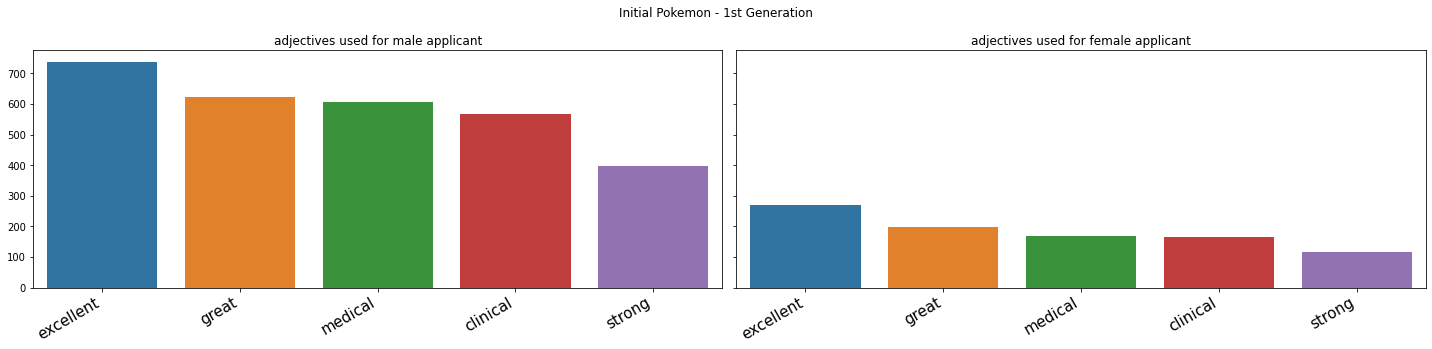

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
ax_0 = axes[0]
ax_1 = axes[1]
sns.barplot(ax =ax_0, x=lor_male_adj_counts.index,y=lor_male_adj_counts.values)
ax_0.set_title("adjectives used for male applicant")

# Charmander
sns.barplot(ax = ax_1, x=lor_female_adj_counts.index,y=lor_female_adj_counts.values)
ax_1.set_title("adjectives used for female applicant")

ax_0.set_xticklabels(labels = lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_1.set_xticklabels(labels = lor_female_adj_counts.index,rotation='45', fontsize=15)

fig.tight_layout()
plt.gcf().autofmt_xdate()


In [145]:
lor_male_lor_male_adj = pd.DataFrame(df_sentiment_male[df_sentiment_male.lor_gender == "male"].adj.sum(),columns=["adj"])
lor_male_lor_female_adj = pd.DataFrame(df_sentiment_male[df_sentiment_male.lor_gender == "female"].adj.sum(),columns=["adj"])
lor_female_lor_male_adj = pd.DataFrame(df_sentiment_female[df_sentiment_female.lor_gender == "male"].adj.sum(),columns=["adj"])
lor_female_lor_female_adj = pd.DataFrame(df_sentiment_female[df_sentiment_female.lor_gender == "female"].adj.sum(),columns=["adj"])

lor_male_lor_male_adj_counts     = lor_male_lor_male_adj.adj.value_counts().head(5)
lor_male_lor_female_adj_counts   = lor_male_lor_female_adj.adj.value_counts().head(5)
lor_female_lor_male_adj_counts   = lor_female_lor_male_adj.adj.value_counts().head(5)
lor_female_lor_female_adj_counts = lor_female_lor_female_adj.adj.value_counts().head(5)

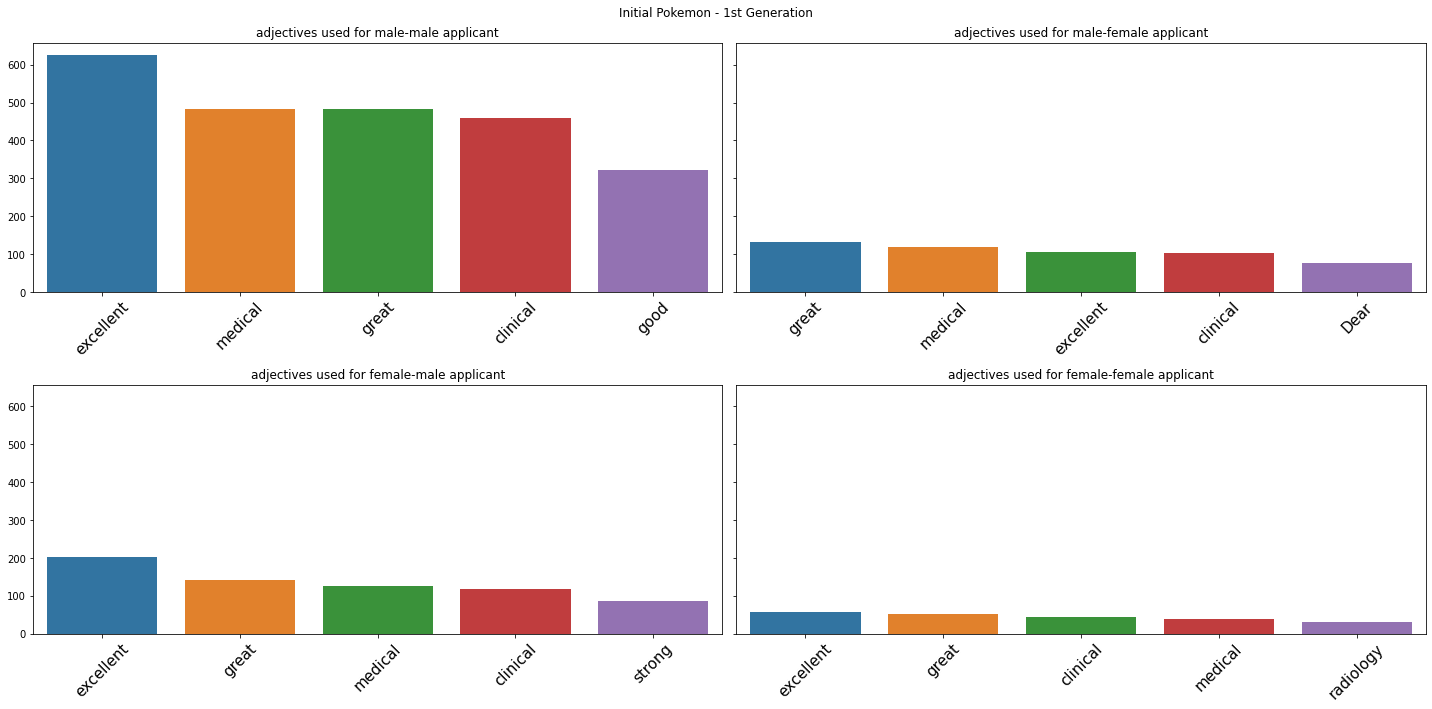

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
ax_0 = axes[0,0]
ax_1 = axes[0,1]
ax_2 = axes[1,0]
ax_3 = axes[1,1]

sns.barplot(ax =ax_0, x=lor_male_lor_male_adj_counts.index,y=lor_male_lor_male_adj_counts.values)
ax_0.set_title("adjectives used for male-male applicant")

# Charmander
sns.barplot(ax = ax_1, x=lor_male_lor_female_adj_counts.index,y=lor_male_lor_female_adj_counts.values)
ax_1.set_title("adjectives used for male-female applicant")

sns.barplot(ax =ax_2, x=lor_female_lor_male_adj_counts.index,y=lor_female_lor_male_adj_counts.values)
ax_2.set_title("adjectives used for female-male applicant")

# Charmander
sns.barplot(ax = ax_3, x=lor_female_lor_female_adj_counts.index,y=lor_female_lor_female_adj_counts.values)
ax_3.set_title("adjectives used for female-female applicant")

ax_0.set_xticklabels(labels = lor_male_lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_1.set_xticklabels(labels = lor_male_lor_female_adj_counts.index,rotation='45', fontsize=15)
ax_2.set_xticklabels(labels = lor_female_lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_3.set_xticklabels(labels = lor_female_lor_female_adj_counts.index,rotation='45', fontsize=15)

fig.tight_layout()


In [63]:
# Sentence clustering

In [59]:
import hdbscan
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')

In [61]:
def bert_embedding(text):
    """
    Return BERT embeddings
    :param model: SentenceTransformer object
    :param text: strings to be embedded
    :return: array
    """
    bert_embeddings = model.encode(text, show_progress_bar = False)
    return bert_embeddings

In [ ]:
bert_embedding(text)

In [63]:
male_sentence_embedding = df_male_sentence.sentence_split.apply(bert_embedding)

In [ ]:
female_sentence_embedding = df_male_sentence.sentence_split.apply(bert_embedding)

In [ ]:
male_sentence_embedding = a

In [1]:
pwd

'f:\\Workspace\\GIT\\AURA_REFERENCE_LETTER'

# Demographics Table

## Overall Column

In [27]:
import joblib
df_new = joblib.load("df_new.h5")

In [42]:
df_new.loc[(df_new.lor_gender == "msle") | (df_new.lor_gender == " male"),"lor_gender"] = "male"

In [43]:
joblib.dump(df_new,"df_new.h5")

['df_new.h5']

In [2]:
df_new.lor.str.contains(r"(keen eye)",case=False).sum()

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


28

In [21]:
df_new.lor[df_new.lor.str.contains(r"(carefull)",case=False)]

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


38                                                                                                                                                                                                                                                                                                                                                                                                                                                 Dear Program Director: It is my great pleasure to highly recommend Rajeev Aravapalli for a body imaging fellowship. As a fellowship trained body and breast imager myself at Beaumont, Farmington Hills, I have come to know Rajeev very well during his time here. Due to our department being on the smaller side, with eight full-time staff, I have had near daily interactions with him. During our time together, he has continually impressed me with his observation skills and meticulous attention to detail. He has repeatedly demonstrated an ability to pick up subtle f

# Outlier Analysis

In [32]:
letter_length_array = df_new.lor.str.len().values

In [76]:
from scipy.stats import skew
skew(letter_length_array)

1.7712111561514987

In [34]:
# method 1.
import numpy as np
Q1 = np.percentile(letter_length_array , 25)
Q3 = np.percentile(letter_length_array , 75)
# method 2.
Q1,Q3 = np.percentile(letter_length_array , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

<AxesSubplot:>

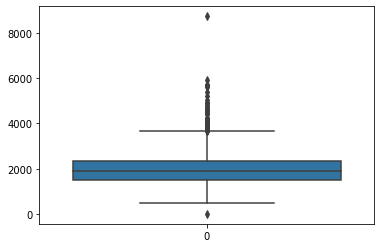

In [77]:
sns.boxplot(letter_length_array)

In [47]:
letter_length_array

array([2536, 3065, 1506, ..., 1375, 1721, 1670], dtype=int64)

<AxesSubplot:ylabel='Count'>

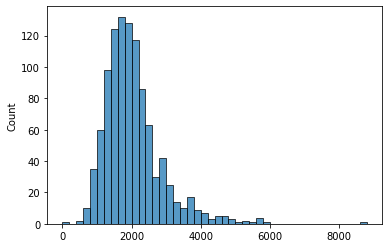

In [67]:
sns.histplot(x=letter_length_array, binwidth=200)

In [44]:
#upper limit
ul

3659.25

In [36]:
#lower limit
ll

175.25

* total letter count

In [39]:
len(letter_length_array)

1036

* Number of letter above upper limit 

In [61]:
(letter_length_array>ul).sum()

54

* Number of letter below lower limit 

In [63]:
(letter_length_array<ll).sum()

1

In [55]:
max(letter_length_array)


8738

In [60]:
np.sort(letter_length_array)

array([   1,  468,  502, ..., 5701, 5904, 8738], dtype=int64)

In [57]:
df_new[df_new.lor.str.len() == max(letter_length_array)].lor.values

array(['It is my tremendous pleasure to write this extremely strong letter of recommendation for Dr. Jami Jadidi’s application to your outstanding neuroradiology fellowship. I have known Dr. Jadidi since July 2016 when he began our radiology residency program. I have personally supervised him at length during his rotations in musculoskeletal imaging and while on call in the emergency room. Additionally, I have been a mentor and advisor to him in his numerous academic scholarly endeavors. I cannot stress enough that Dr. Jadidi is to date the finest resident I have ever worked with in my 12 years of being an attending physician at SUNY Downstate Health Sciences University. He has demonstrated a command of radiology medical knowledge, has shown tremendous involvement and significant interest in research activities, participates in unending University and Hospital service and gives unwavering dedication to his patients and those less fortunate than himself. It is because of these qualities

In [65]:
df_new[df_new.lor.str.len() == min(letter_length_array)].lor.values

array([' '], dtype=object)

In [64]:
min(letter_length_array)

1

## end of the outlier analysis

In [78]:
df_new_sentence = get_df_sentence(df_new, "lor")

In [79]:
df_new_sentence

,sentence_split,lor_id
0,"dear dr. dachman, i am writing this letter to enthusiastically support dr. caline azzi for a fellowship position in your department",0
1,dr. azzi is currently a 3rd-year radiology resident pgy-4 at the american university of beirut medical center,0
2,the radiology residency program at aub is accredited by the acgme- international,0
3,"in addition, residents are eligible to sit for the fellowship of the royal college of radiology frcr",0
4,i have known dr. azzi since february 2018,0
...,...,...
19046,"robert has been well trained and is competent in all bread and butter radiology procedures including ct and ultrasound guided biopsies, abscess drainages, picc placement, arthrograms, and myelograms",1342
19047,our residents receive excellent training in mammography and breast imaging and robert is quite skilled at stereotactic and ultrasound guided breast biopsies,1342
19048,"his patient care skills are excellent, the patients love him",1342
19049,"in summary, robert niedermeyer is an excellent radiology resident and i heartily endorse him for any position to which he is applying",1342


# writer gender anaylsis

In [ ]:
df_sentence =  get_df_sentence(df_new, "lor")

In [ ]:
df_sentence.shape[0]/df_new.shape[0]

18.37934362934363

In [ ]:
df_new_lor_male = df_new.loc[df_new.lor_gender == "male"]
df_new_lor_female = df_new.loc[df_new.lor_gender == "female"]

In [ ]:
df_new_lor_male_sentence = get_df_sentence(df_new_lor_male, "lor")
df_new_lor_female_sentence = get_df_sentence(df_new_lor_female, "lor")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
lor_male_sentence_ratio = df_new_lor_male_sentence.shape[0]/df_new_lor_male.shape[0]
print("male_writer_sentence_ratio", lor_male_sentence_ratio)
#%%

male_writer_sentence_ratio 18.181598062953995


In [ ]:
lor_female_sentence_ratio = df_new_lor_female_sentence.shape[0]/df_new_lor_female.shape[0]
print("female_writer_sentence_ratio", lor_female_sentence_ratio)

female_writer_sentence_ratio 19.32323232323232


In [ ]:
lor_male_report_size = df_new_lor_male_sentence.groupby("lor_id").size()
lor_female_report_size = df_new_lor_female_sentence.groupby("lor_id").size()


In [ ]:
lor_female_report_size.mean()

19.32323232323232

In [ ]:
lor_male_report_size.mean()

18.181598062953995

In [ ]:
print("mf",ttest_ind(lor_male_report_size,lor_female_report_size))


mf Ttest_indResult(statistic=-2.1985143263709426, pvalue=0.02813601689610822)


### Word average

In [101]:
df_new_lor_male_sentence["word"] = df_new_lor_male_sentence.sentence_split.apply(word_tokenize)
male_writer_word_count = df_new_lor_male_sentence.word.str.len().sum()
male_writer_average_word_count_per_letter = male_writer_word_count/df_new_lor_male.shape[0]
print("male_writer_average_word_count_per_letter",male_writer_average_word_count_per_letter)

male_writer_average_word_count_per_letter 338.953995157385


In [102]:
df_new_lor_female_sentence["word"] = df_new_lor_female_sentence.sentence_split.apply(word_tokenize)
female_writer_word_count = df_new_lor_female_sentence.word.str.len().sum()
female_writer_average_word_count_per_letter = female_writer_word_count/df_new_lor_female.shape[0]
print("female_writer_average_word_count_per_letter",female_writer_average_word_count_per_letter)

female_writer_average_word_count_per_letter 368.8939393939394


In [115]:
df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
writer_word_count = df_sentence.word.str.len().sum()
writer_average_word_count_per_letter = writer_word_count/df_new.shape[0]
print("writer_average_word_count_per_letter",writer_average_word_count_per_letter)

writer_average_word_count_per_letter 344.52702702702703


In [112]:
writer_female_word_counts = df_new_lor_female_sentence.explode("word").groupby("lor_id").count().word.values

In [113]:
writer_male_word_counts = df_new_lor_male_sentence.explode("word").groupby("lor_id").count().word.values

In [114]:
print("mf",ttest_ind(writer_male_word_counts,writer_female_word_counts))

mf Ttest_indResult(statistic=-2.6988427434025857, pvalue=0.007072862347735987)


## end of writer gender anaylsis

In [62]:
df_new["standard_position"] = ""
df_new.lor_position = df_new.lor_position.fillna("")
df_new.loc[df_new.lor_position.str.contains(r"asso[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "associate professor"
df_new.loc[df_new.lor_position.str.contains(r"assi[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "assistant professor"
df_new.loc[ ~df_new.lor_position.str.contains(r"as[\w\.]*\s*prof[\w\.]*|assistant\s*clinical\s*prof[\w\.]|associate\s*clinical\s*prof[\w\.]*",case=False) & df_new.lor_position.str.contains("prof[\w\.]*",case=False),"standard_position"] = "professor"
df_new.loc[(df_new["standard_position"] != "associate professor") &
           (df_new["standard_position"] != "assistant professor") & 
           (df_new["standard_position"] != "professor"),"standard_position"] = "others"
df_new.loc[(df_new["standard_position"] == "others") & (df_new.lor_position.str.contains(r"director|chair|dean",case=False)),"standard_position"] = "manager"

In [45]:
df_new.standard_position.value_counts()


manager                240
assistant professor    234
others                 195
professor              193
associate professor    174
Name: standard_position, dtype: int64

In [52]:
df_asso = df_new.loc[(df_new.standard_position=="associate professor")]
df_asso.lor_gender.value_counts(dropna=False)

male      139
female     34
NaN         1
Name: lor_gender, dtype: int64

In [53]:
df_ass = df_new.loc[(df_new.standard_position=="assistant professor")]
df_ass.lor_gender.value_counts(dropna=False)

male      172
female     58
NaN         3
?           1
Name: lor_gender, dtype: int64

In [54]:
df_prof = df_new.loc[(df_new.standard_position=="professor")]
df_prof.lor_gender.value_counts(dropna=False)

male      156
female     35
NaN         1
?           1
Name: lor_gender, dtype: int64

In [55]:
df_manager = df_new.loc[(df_new.standard_position=="manager")]
df_manager.lor_gender.value_counts(dropna=False)

male      196
female     40
NaN         3
?           1
Name: lor_gender, dtype: int64

In [56]:
df_new.lor_gender.dropna().shape

(1027,)

In [37]:
df_new.lor_id

0          0
1          1
2          2
3          3
4          4
        ... 
1337    1337
1338    1338
1340    1340
1341    1341
1342    1342
Name: lor_id, Length: 1036, dtype: int64

In [57]:
df_other = df_new.loc[(df_new.standard_position=="others")]
df_other.lor_gender.value_counts(dropna=False)

male      163
female     31
NaN         1
Name: lor_gender, dtype: int64

In [58]:
df_asso.gender.value_counts(dropna=False)

male      133
female     39
NaN         2
Name: gender, dtype: int64

In [ ]:
df

In [59]:
(df_new.lor_gender=="female").sum() + df_new.lor_gender.isna().sum() + (df_new.lor_gender=="male").sum()

1033

In [29]:
df_new.lor_gender.isna().sum()

9

In [47]:
df_new[df_new.gender.isna()]

,applicant_id,application_year,birth_year,citizenship,foreign,medical_school,residency_school,md_year,residency_year,step1,step2,step3,step_old,IMG,class_rank,honors,received_offer,language_skills,interests,number_of_publications,speciality,gender,lor,lor_position,lor_university,lor_gender,lor_number,lor_id,standard_position
76,19,2018.0,1986,0,1,bachelar of medicine ond bachelor of surgery kasturba medical college,Mercy Catholic Medical Center,2010.0,2014-current,192,223,201,0,0.0,NaN,NaN,NaN,"English,hindi,sanskrit,kannada","Hockey, Soccer, Cricket, Table tennis.",NaN,NaN,NaN,"Dear Dr. Dachman, I am writing this letter in enthusiastic support of Vivek Halappa for an abdominal imaging fellowship position with your department. As one of Vivek's attendings at Mercy Catholic Medical Center MCMC, I feel qualified to comment on his skills and talents as a radiology resident. As the assistant program director for the radiology residency, I can also provide you with information regarding his leadership and interpersonal skills. Before joining our program, Vivek was a postdoctoral research fellow at Johns Hopkins where he authored numerous papers and won several awards. He came highly recommended and Vivek quickly distinguished himself as one of our most compassionate and hard working residents. in addition to being the best resident in his class, l would rank him in the top ten percent of residents I have interacted with during my own training at the Mallinckrodt Institute of Radiology and the University of Pennsylvania. Objective evidence of Vivek's talents can be found in his recent ACR in training scores which rank in the 80-90 percentile of all radiology residents at his PGY level. Attending radiologists in our department look forward to Vivek being on their service because he has great enthusiasm and functions at a high !eve!. His reports are concise yet thorough and require little editing. one of Vivek's strongest attributes is his ability to discuss cases with referring clinical teams in a manner that makes the imaging findings understandable to everyone on the team, from the attending physician to the medical student. On night float, he effıciently reviews and dictates cases at the !eve! ofa fellow/junior attending. in addition to his clinical work, Vivek has continued producing multiple book chapters, articles and presentations. He has expressed an interest in academic radiology particularly oncologic imaging and his work ethic, intellectual curiosity, and dedication to the fıeld of radiology will be the foundations for a bright fut...","Associate Program Director,Assistant Professor","Mercy Catholic Medical Center,Drexel University College of Medicine",male,lor1,76,assistant professor
77,19,2018.0,1986,0,1,bachelar of medicine ond bachelor of surgery kasturba medical college,Mercy Catholic Medical Center,2010.0,2014-current,192,223,201,0,0.0,NaN,NaN,NaN,"English,hindi,sanskrit,kannada","Hockey, Soccer, Cricket, Table tennis.",NaN,NaN,NaN,"Dear Dr. Dachman, it is a pleasure to write a recommendation for Dr. Vivek Halappa for an abdominal imaging fellowship position in your institution. Dr. Halappa is embarking on his third year of radiology residency at Mercy Catholic Medical Center. He also spent his internship in the medicine department here. 1 have known him and worked with him for the last three years in my capacity as section head of interventional radiology. Vivek is a competent and conscientious young physician who brings a strong clinical background to our program. He is well read and applies his knowledge with a practical and common sense approach. As such he is an easy apprentice to teach. I have had the opportunity to teach and observe Vivek during routine conferences as well as three interventional radiology rotations, thus far. Vivek approaches every task and responsibility with an indomitable spirit. His zeal for interventional radiology was clear as he melded youthful enthusiasm with purposeful industry. When

In [65]:

overall_total_number_of_applicants = df_new.applicant_id.unique().shape[0]
print("total_number_of_applicants",overall_total_number_of_applicants)
overall_total_number_of_letters = df_new.shape[0]
print("total_number_of_letters",overall_total_number_of_letters)
overall_average_number_of_letters = overall_total_number_of_letters/overall_total_number_of_applicants
print("average_number_of_letters",overall_average_number_of_letters)
df_new_sentence = get_df_sentence(df_new, "lor")
overall_average_sentence_count_per_letter = df_new_sentence.shape[0]/df_new.shape[0]
print("average_sentence_count_per_letter",overall_average_sentence_count_per_letter)
df_new_sentence["word"] = df_new_sentence.sentence_split.apply(word_tokenize)
overall_total_word_count = df_new_sentence.word.str.len().sum()
overall_average_word_count_per_letter = overall_total_word_count/df_new.shape[0]
print("average_word_count_per_letter",overall_average_word_count_per_letter)
overall_male_writer_count = (df_new.lor_gender=="male").sum()
print("male_writer_count",overall_male_writer_count)

overall_female_writer_count = (df_new.lor_gender=="female").sum()
print("female_writer_count",overall_female_writer_count)

df_new.lor_position = df_new.lor_position.fillna("")

df_new.lor_position.value_counts()
overall_asso_prof_count = df_new.loc[df_new["standard_position"] == "associate professor"].shape[0]
print("asso_prof_count",overall_asso_prof_count)

overall_assis_prof_count = df_new.loc[df_new["standard_position"] == "assistant professor"].shape[0]
print("assis_prof_count",overall_assis_prof_count)

overall_prof_count = df_new.loc[df_new["standard_position"] == "professor"].shape[0]
print("prof_count",overall_prof_count)

overall_manager_count = df_new.loc[df_new["standard_position"] == "manager"].shape[0]
print("manager_count",overall_manager_count)

overall_others_count = df_new.loc[df_new["standard_position"] == "others"].shape[0] 
print("others_count",overall_others_count)


total_number_of_applicants 336
total_number_of_letters 1036
average_number_of_letters 3.0833333333333335
average_sentence_count_per_letter 18.37934362934363
average_word_count_per_letter 344.52702702702703
male_writer_count 826
female_writer_count 198
asso_prof_count 174
assis_prof_count 234
prof_count 193
manager_count 240
others_count 195


In [64]:
df_new["standard_position"].value_counts()

manager                240
assistant professor    234
others                 195
professor              193
associate professor    174
Name: standard_position, dtype: int64

In [171]:
print("others",overall_others_count)

others 427


In [8]:
df_new.columns

Index(['applicant_id', 'application_year', 'birth_year', 'citizenship',
       'foreign', 'medical_school', 'residency_school', 'md_year',
       'residency_year', 'step1', 'step2', 'step3', 'step_old', 'IMG',
       'class_rank', 'honors', 'received_offer', 'language_skills',
       'interests', 'number_of_publications', 'speciality', 'gender', 'lor',
       'lor_position', 'lor_university', 'lor_gender', 'lor_number', 'lor_id',
       'standard_position'],
      dtype='object')

In [69]:
def get_table_column(df,column_name,csv_name):
    count_list = []
    percentage_list = []
    
    total_number_of_applicants = df.applicant_id.unique().shape[0]
    total_number_of_applicants_percentage = (total_number_of_applicants/overall_total_number_of_applicants)*100
    print(f"{column_name}_total_number_of_applicants",total_number_of_applicants)
    print(f"{column_name}_precentage_total_number_of_applicants",total_number_of_applicants_percentage)
    count_list.append(total_number_of_applicants)
    percentage_list.append(total_number_of_applicants_percentage)
    
    
    total_number_of_letters = df.shape[0]
    total_number_of_letters_percentage = (total_number_of_letters/overall_total_number_of_letters)*100
    print(f"{column_name}_total_number_of_letters",total_number_of_letters)
    print(f"{column_name}_precentage_total_number_of_letters",total_number_of_letters_percentage)
    count_list.append(total_number_of_letters)
    percentage_list.append(total_number_of_letters_percentage)
    
    
    average_number_of_letters = total_number_of_letters/total_number_of_applicants
    print(f"{column_name}_average_number_of_letters",average_number_of_letters)
    print(f"{column_name}_precentage_average_number_of_letters",(average_number_of_letters/overall_average_number_of_letters)*100)
    count_list.append(average_number_of_letters)
    percentage_list.append((average_number_of_letters/overall_average_number_of_letters)*100)   
    
    
    df_sentence = get_df_sentence(df, "lor")
    average_sentence_count_per_letter = df_sentence.shape[0]/df.shape[0]
    print(f"{column_name}_average_sentence_count_per_letter",average_sentence_count_per_letter)
    print(f"{column_name}_precentage_average_sentence_count_per_letter",(average_sentence_count_per_letter/overall_average_sentence_count_per_letter)*100)
    count_list.append(average_sentence_count_per_letter)
    percentage_list.append((average_sentence_count_per_letter/overall_average_sentence_count_per_letter)*100)  
    
    df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
    total_word_count = df_sentence.word.str.len().sum()
    average_word_count_per_letter = total_word_count/df.shape[0]
    print(f"{column_name}_average_word_count_per_letter",average_word_count_per_letter)
    print(f"{column_name}_precentage_average_word_count_per_letter",(average_word_count_per_letter/overall_average_word_count_per_letter)*100)
    count_list.append(average_word_count_per_letter)
    percentage_list.append((average_word_count_per_letter/overall_average_word_count_per_letter)*100)  
    
    female_writer_count = (df.lor_gender=="female").sum()
    print(f"{column_name}_female_writer_count",female_writer_count)
    print(f"{column_name}_precentage_female_writer_count",(female_writer_count/overall_female_writer_count)*100)
    count_list.append(female_writer_count)
    percentage_list.append((female_writer_count/overall_female_writer_count)*100)  
    
    male_writer_count = (df.lor_gender=="male").sum()
    print(f"{column_name}_male_writer_count",male_writer_count)
    print(f"{column_name}_precentage_male_writer_count",(male_writer_count/overall_male_writer_count)*100)
    count_list.append(male_writer_count)
    percentage_list.append((male_writer_count/overall_male_writer_count)*100)  
   
    df.lor_position = df.lor_position.fillna("")

    prof_count = df.loc[df.standard_position == "professor"].shape[0]
    print(f"{column_name}_prof_count",prof_count)
    print(f"{column_name}_precentage_prof_count",(prof_count/overall_prof_count)*100)
    count_list.append(prof_count)
    percentage_list.append((prof_count/overall_prof_count)*100)  

    asso_prof_count = df.loc[df.standard_position == "associate professor"].shape[0]
    print(f"{column_name}_asso_prof_count",asso_prof_count)
    print(f"{column_name}_precentage_asso_prof_count",(asso_prof_count/overall_asso_prof_count)*100)
    count_list.append(asso_prof_count)
    percentage_list.append((asso_prof_count/overall_asso_prof_count)*100)  
    
    assis_prof_count = df.loc[df.standard_position == "assistant professor"].shape[0]
    print(f"{column_name}_assis_prof_count",assis_prof_count)
    print(f"{column_name}_precentage_assis_prof_count",(assis_prof_count/overall_assis_prof_count)*100)
    count_list.append(assis_prof_count)
    percentage_list.append((assis_prof_count/overall_assis_prof_count)*100)  
    
    manager_count = df.loc[df.standard_position == "manager"].shape[0]
    print(f"{column_name}_manager_count",manager_count)
    print(f"{column_name}_precentage_manager_count",(manager_count/overall_manager_count)*100)
    count_list.append(manager_count)
    percentage_list.append((manager_count/overall_manager_count)*100)  
    
    
    
    others_count = df.loc[df.standard_position == "others"].shape[0]
    print(f"{column_name}others_count",others_count)
    print(f"{column_name}_precentage_others_count",(others_count/overall_others_count)*100)
    count_list.append(others_count)
    percentage_list.append((others_count/overall_others_count)*100)    
    
    index_list = ["Total number of applicants",
                  "Total number of letters",
                  "Average number of letters",
                  "Average sentence count per letter",
                  "Average word count per letter",
                  "Female",
                  "Male",
                  "Full professor",
                  "Associate professor",
                  "Assistant professor",
                  "Manager",
                  "Not applicable/Unknown"]

    df = pd.DataFrame({"counts":count_list, "percentage":percentage_list},index =index_list ) 
    df.to_csv(".//demographics_results//" + csv_name + ".csv")

In [70]:
df_male = df_new.loc[df_new.gender == "male"]
get_table_column(df_male,"male","male")

male_total_number_of_applicants 261
male_precentage_total_number_of_applicants 77.67857142857143
male_total_number_of_letters 805
male_precentage_total_number_of_letters 77.7027027027027
male_average_number_of_letters 3.0842911877394634
male_precentage_average_number_of_letters 100.03106554830691


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_average_sentence_count_per_letter 18.104347826086958
male_precentage_average_sentence_count_per_letter 98.50377788890336
male_average_word_count_per_letter 340.4086956521739
male_precentage_average_word_count_per_letter 98.80464200141544
male_female_writer_count 142
male_precentage_female_writer_count 71.71717171717171
male_male_writer_count 657
male_precentage_male_writer_count 79.53995157384988
male_prof_count 152
male_precentage_prof_count 78.75647668393782
male_asso_prof_count 133
male_precentage_asso_prof_count 76.4367816091954
male_assis_prof_count 170
male_precentage_assis_prof_count 72.64957264957265
male_manager_count 198
male_precentage_manager_count 82.5
maleothers_count 152
male_precentage_others_count 77.94871794871796


In [71]:
df_female = df_new.loc[df_new.gender == "female"]
get_table_column(df_female,"female","female")

female_total_number_of_applicants 73
female_precentage_total_number_of_applicants 21.726190476190478
female_total_number_of_letters 223
female_precentage_total_number_of_letters 21.525096525096522
female_average_number_of_letters 3.0547945205479454
female_precentage_average_number_of_letters 99.07441688263606
female_average_sentence_count_per_letter 19.2152466367713
female_precentage_average_sentence_count_per_letter 104.54805690717434


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


female_average_word_count_per_letter 356.9237668161435
female_precentage_average_word_count_per_letter 103.59819079974355
female_female_writer_count 55
female_precentage_female_writer_count 27.77777777777778
female_male_writer_count 162
female_precentage_male_writer_count 19.612590799031477
female_prof_count 41
female_precentage_prof_count 21.243523316062177
female_asso_prof_count 39
female_precentage_asso_prof_count 22.413793103448278
female_assis_prof_count 59
female_precentage_assis_prof_count 25.213675213675213
female_manager_count 42
female_precentage_manager_count 17.5
femaleothers_count 42
female_precentage_others_count 21.53846153846154


In [72]:
df_foreign = df_new.loc[df_new.foreign == 1]
get_table_column(df_foreign,"foreign","foreign_yes")

foreign_total_number_of_applicants 95
foreign_precentage_total_number_of_applicants 28.273809523809522
foreign_total_number_of_letters 295
foreign_precentage_total_number_of_letters 28.474903474903474
foreign_average_number_of_letters 3.1052631578947367
foreign_precentage_average_number_of_letters 100.71123755334281
foreign_average_sentence_count_per_letter 18.11864406779661
foreign_precentage_average_sentence_count_per_letter 98.58156217760246


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


foreign_average_word_count_per_letter 346.64406779661016
foreign_precentage_average_word_count_per_letter 100.61447741498
foreign_female_writer_count 39
foreign_precentage_female_writer_count 19.696969696969695
foreign_male_writer_count 253
foreign_precentage_male_writer_count 30.629539951573847
foreign_prof_count 62
foreign_precentage_prof_count 32.12435233160622
foreign_asso_prof_count 37
foreign_precentage_asso_prof_count 21.26436781609195
foreign_assis_prof_count 54
foreign_precentage_assis_prof_count 23.076923076923077
foreign_manager_count 69
foreign_precentage_manager_count 28.749999999999996
foreignothers_count 73
foreign_precentage_others_count 37.43589743589744


In [73]:
df_foreign = df_new.loc[df_new.foreign == 0]
get_table_column(df_foreign,"not_foreign","foreign_no")

not_foreign_total_number_of_applicants 241
not_foreign_precentage_total_number_of_applicants 71.72619047619048
not_foreign_total_number_of_letters 741
not_foreign_precentage_total_number_of_letters 71.52509652509652
not_foreign_average_number_of_letters 3.074688796680498
not_foreign_precentage_average_number_of_letters 99.71963664909723


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


not_foreign_average_sentence_count_per_letter 18.483130904183536
not_foreign_precentage_average_sentence_count_per_letter 100.564695219443
not_foreign_average_word_count_per_letter 343.6842105263158
not_foreign_precentage_average_word_count_per_letter 99.75536998998771
not_foreign_female_writer_count 159
not_foreign_precentage_female_writer_count 80.3030303030303
not_foreign_male_writer_count 573
not_foreign_precentage_male_writer_count 69.37046004842615
not_foreign_prof_count 131
not_foreign_precentage_prof_count 67.87564766839378
not_foreign_asso_prof_count 137
not_foreign_precentage_asso_prof_count 78.73563218390804
not_foreign_assis_prof_count 180
not_foreign_precentage_assis_prof_count 76.92307692307693
not_foreign_manager_count 171
not_foreign_precentage_manager_count 71.25
not_foreignothers_count 122
not_foreign_precentage_others_count 62.56410256410256


In [1]:
df_new

NameError: name 'df_new' is not defined

# Word Analysis

In [108]:
import pandas as pd
import re
import numpy as np
import scipy.stats as stats
df_word_list = pd.read_excel("LOR Project_reviewed.xlsx",sheet_name="Word list")

In [109]:
df_word_list["Agency"].str.strip().str.lower().str.replace(r"\*",r"/w*").dropna().tolist()

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


['achieve\\w*',
 'active\\w*',
 'aggressive',
 'ambitio\\w*',
 'analyt\\w*',
 'aspirat\\w*',
 'assertive',
 'attention',
 'autonom\\w*',
 'competen\\w*',
 'competing',
 'confiden\\w*',
 'courage\\w*',
 'decisive',
 'dedicat\\w*',
 'defend',
 'desire',
 'determination',
 'determined',
 'force\\w*',
 'goal oriented',
 'goal-oriented',
 'hard work\\w*',
 'independen\\w*',
 'industrious',
 'industrious\\w*',
 'intelligen\\w*',
 'lead\\w*',
 'master',
 'mastered',
 'mastery',
 'outspoken',
 'rewards',
 'self direct\\w*',
 'self motivated',
 'self starter',
 'self-assure\\w*',
 'self-direct\\w*',
 'self driven',
 'self-driven',
 'self-motivated',
 'self-relian\\w*',
 'self-starter',
 'serious',
 'skill\\w*',
 'strong',
 'tough',
 'under pressure',
 'work ethic',
 'work-ethic']

In [140]:
agency = df_word_list["Agency"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
communality = df_word_list["Communality"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
grindstone = df_word_list["Grindstone"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
standout = df_word_list["Standout"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
social = df_word_list["Social"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
radiology = df_word_list["Radiology"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
keen_good = ["keen eye","good eye"]


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True 

In [137]:
radiology

['good eye',
 'high volume',
 'observational skills',
 'focus',
 'attention',
 'keen eye']

In [111]:
radiology

['good eye',
 'high volume',
 'observational skills',
 'focus',
 'attention',
 'keen eye']

In [138]:
agency_pattern = r"\b" + r"\b|\b".join(agency) + r"\b"
communality_pattern = r"\b" + r"\b|\b".join(communality) + r"\b"
grindstone_pattern = r"\b" + r"\b|\b".join(grindstone) + r"\b"
standout_pattern = r"\b" + r"\b|\b".join(standout) + r"\b"
social_pattern = r"\b" + r"\b|\b".join(social) + r"\b"
radiology_pattern = r"\b" + r"\b|\b".join(radiology) + r"\b"
keen_good_pattern = r"\b" + r"\b|\b".join(keen_good) + r"\b"


In [141]:
def create_pattern(word_list):
    pattern = r"\b" + r"\b|\b".join(word_list) + r"\b"
    pattern = re.sub(r"\s+",r" ",pattern)
    pattern = re.sub(r"$\s+|^\s+",r"",pattern)
    pattern = re.sub(r"\s",r"-",pattern)

    

    pattern = re.sub(r"-",r"\\s*-*\\s*",pattern)
    return pattern

In [142]:
agency_pattern = create_pattern(agency)
communality_pattern = create_pattern(communality) 
grindstone_pattern = create_pattern(grindstone) 
standout_pattern = create_pattern(standout)
social_pattern = create_pattern(social)
radiology_pattern = create_pattern(radiology)
keen_good_pattern = create_pattern(keen_good)

In [143]:
df_female = df_new.loc[(df_new.gender == "female")]
df_male = df_new.loc[(df_new.gender == "male")]
df_writer_male = df_new.loc[(df_new.lor_gender == "male")]
df_writer_female = df_new.loc[(df_new.lor_gender == "female")]
df_prof = df_new.loc[df_new.standard_position == "professor"]
df_asso_prof = df_new.loc[df_new.standard_position == "associate professor"]
df_asis_prof = df_new.loc[df_new.standard_position == "assistant professor"]
df_other = df_new.loc[df_new.standard_position == "others"]
df_female_male = df_new.loc[(df_new.lor_gender == "male") & (df_new.gender == "female")]
df_male_male = df_new.loc[(df_new.lor_gender == "male") & (df_new.gender == "male")]
df_female_female = df_new.loc[(df_new.lor_gender == "female") & (df_new.gender == "female")]
df_male_female = df_new.loc[(df_new.lor_gender == "female") & (df_new.gender == "male")]


In [117]:
# def get_word_result_agecy_comm(df,column_name):
#     df_sentence = get_df_sentence(df, "lor")
#     df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
#     overall_total_word_count = df_sentence.word.str.len().sum()

#     found_words_list = df.lor.str.lower().str.findall(agency_pattern).sum()    
#     total_agency_comm_words_list = df.lor.str.lower().str.findall(agency_pattern).sum() + df.lor.str.lower().str.findall(communality_pattern).sum()

#     if type(found_words_list) == list:
#         agency_result = len(found_words_list)
#         total_agency_comm_words_list_result = len(total_agency_comm_words_list)
#     else:
#         agency_result = 0
#     print(f"{column_name}_agency_result",agency_result)
#     print(f"{column_name}_percentage_agency_result: %",(agency_result/total_agency_comm_words_list_result)*100)
    
#     found_words_list = df.lor.str.lower().str.findall(communality_pattern).sum()
#     if type(found_words_list) == list:
#         communality_result = len(found_words_list)
#     else:
#         communality_result = 0
        
#     print(f"{column_name}_communality_result",communality_result)
#     print(f"{column_name}_percentage_communality_result: %",(communality_result/total_agency_comm_words_list_result)*100)

In [118]:
sum([3,4,5])

12

In [196]:
word_pattern_list = [agency_pattern,communality_pattern, grindstone_pattern, standout_pattern,social_pattern, radiology_pattern,keen_good_pattern]


def get_word_result(df,column_name):
    df_sentence = get_df_sentence(df, "lor")
    df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
    #total word count for all word patterns
    overall_total_word_count = 0
    for pattern in word_pattern_list:
        found_special_word_list = df.lor.str.lower().str.findall(pattern).sum() 
        if type(found_special_word_list) == list:
            word_count = len(found_special_word_list)
        else:
            word_count = 0
        overall_total_word_count +=word_count

    #overall_total_word_count = df_sentence.word.str.len().sum()

    found_words_list = df.lor.str.lower().str.findall(agency_pattern).sum()    

    if type(found_words_list) == list:
        agency_result = len(found_words_list)
    else:
        agency_result = 0
    print(f"{column_name}_agency_result",agency_result)
    agency_percentage = (agency_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_agency_result: %",agency_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(communality_pattern).sum()
    if type(found_words_list) == list:
        communality_result = len(found_words_list)
    else:
        communality_result = 0
        
    print(f"{column_name}_communality_result",communality_result)
    communality_percentage = (communality_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_communality_result: %",communality_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(grindstone_pattern).sum()
    if type(found_words_list) == list:
        grindstone_result = len(found_words_list)
    else:
        grindstone_result = 0
    print(f"{column_name}_grindstone_result",grindstone_result)
    grindstone_percentage = (grindstone_result/overall_total_word_count)*100
    print(f"{column_name}_percentage__grindstone_result: %",grindstone_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(standout_pattern).sum()
    if type(found_words_list) == list:
        standout_result = len(found_words_list)
    else:
        standout_result = 0
    print(f"{column_name}_standout_result",standout_result)
    standout_percentage = (standout_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_standout_result: %",standout_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(social_pattern).sum()
    if type(found_words_list) == list:
        social_result = len(found_words_list)
    else:
        social_result = 0
    print(f"{column_name}_social_result",social_result)
    social_percentage = (social_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_social_result: %",social_percentage)
    
    
    found_words_list = df.lor.str.lower().str.findall(radiology_pattern).sum()
    if type(found_words_list) == list:
        radiology_result = len(found_words_list)
    else:
        radiology_result = 0

    print(f"{column_name}_radiology_result",radiology_result)
    radiology_percentage = (radiology_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_radiology_result: %",radiology_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(keen_good_pattern).sum()
    if type(found_words_list) == list:
        keen_good_result = len(found_words_list)
    else:
        keen_good_result = 0
    
    print(f"{column_name}_keen_good_result",keen_good_result)
    keen_good_percentage = (keen_good_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_keen_good_result: %",keen_good_percentage)
    
    result_dic = {"agency_count":agency_result,
                  "communality_count":communality_result,
                  "grindstone_count":grindstone_result,
                  "standout_count":standout_result,
                  "social_count": social_result,
                  "radiology_count":radiology_result,
                  "keen_good_count":keen_good_result                         
                  }
    
    result_list = result_dic.values()
    percentage_list = [agency_percentage,communality_percentage, grindstone_percentage, standout_percentage, social_percentage, radiology_percentage,keen_good_percentage]
    df_result = pd.DataFrame({"word_counts":result_list,
                  "percentages":percentage_list},index= list(result_dic.keys()))
    df_result.to_csv(f"./word_counts_results/{column_name}.csv")
    return result_dic

In [197]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[8, 2], [1, 5]])
oddsratio

20.0

In [198]:
app_male_dict = get_word_result_agecy_comm(df_male,"applicant_male")

NameError: name 'get_word_result_agecy_comm' is not defined

In [199]:
print(app_male_dict)

{'agency_count': 3496, 'communality_count': 1536, 'grindstone_count': 917, 'standout_count': 1740, 'social_count': 93, 'radiology_count': 183, 'keen_good_count': 51}


In [200]:
get_word_result_agecy_comm(df_female,"applicant_female")

NameError: name 'get_word_result_agecy_comm' is not defined

In [201]:
app_male_dict = get_word_result(df_male,"applicant_male")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_male_agency_result 3496
applicant_male_percentage_agency_result: % 43.6127744510978
applicant_male_communality_result 1536
applicant_male_percentage_communality_result: % 19.16167664670659
applicant_male_grindstone_result 917
applicant_male_percentage__grindstone_result: % 11.439620758483034
applicant_male_standout_result 1740
applicant_male_percentage_standout_result: % 21.706586826347305
applicant_male_social_result 93
applicant_male_percentage_social_result: % 1.1601796407185627
applicant_male_radiology_result 183
applicant_male_percentage_radiology_result: % 2.282934131736527
applicant_male_keen_good_result 51
applicant_male_percentage_keen_good_result: % 0.6362275449101796


In [202]:
app_male_dict

{'agency_count': 3496,
 'communality_count': 1536,
 'grindstone_count': 917,
 'standout_count': 1740,
 'social_count': 93,
 'radiology_count': 183,
 'keen_good_count': 51}

In [203]:
app_female_dict = get_word_result(df_female,"applicant_female")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_female_agency_result 1067
applicant_female_percentage_agency_result: % 43.56880359330339
applicant_female_communality_result 449
applicant_female_percentage_communality_result: % 18.33401388321764
applicant_female_grindstone_result 250
applicant_female_percentage__grindstone_result: % 10.208248264597795
applicant_female_standout_result 567
applicant_female_percentage_standout_result: % 23.1523070641078
applicant_female_social_result 33
applicant_female_percentage_social_result: % 1.347488770926909
applicant_female_radiology_result 72
applicant_female_percentage_radiology_result: % 2.939975500204165
applicant_female_keen_good_result 11
applicant_female_percentage_keen_good_result: % 0.449162923642303


In [204]:

app_male_choosen = app_male_dict["agency_count"]
app_male_others = sum([value for key,value in app_male_dict.items() if key != "agency_count"])
app_female_choosen = app_female_dict["agency_count"]
app_female_others = sum([value for key,value in app_female_dict.items() if key != "agency_count"])


oddsratio, pvalue = stats.fisher_exact([[app_male_choosen, app_male_others],[app_female_choosen,app_female_others]])  
print(oddsratio, pvalue)


1.0017898167884483 0.9814282757595731


In [205]:
def get_odds_ratio(word_type,dict_1,dict_2):
    
    group_1_choosen_type_count = dict_1[word_type+"_count"]
    group_1_others_count = sum([value for key,value in dict_1.items() if key != word_type+"_count"])
    group_2_choosen_type_count = dict_2[word_type+"_count"]
    group_2_others_count = sum([value for key,value in dict_2.items() if key != word_type+"_count"])


    oddsratio, pvalue = stats.fisher_exact([[group_1_choosen_type_count, group_1_others_count],[group_2_choosen_type_count, group_2_others_count]])  
    #print("oddsratio:",oddsratio, "\npvalue:",pvalue)
    return oddsratio, pvalue

In [206]:
word_type_list = ["agency","communality", "grindstone", "standout","social", "radiology","keen_good"]


In [207]:
def word_odd_analyse(dict_1,dict_2,csv_name):
    odds_ratio_list  = []
    p_value_list=[]
    for word_type in word_type_list:
        odds_ratio,p_value = get_odds_ratio(word_type,dict_1,dict_2)
        odds_ratio_list.append(odds_ratio)
        p_value_list.append(p_value)
    df = pd.DataFrame({"od":odds_ratio_list,"p":p_value_list},index = word_type_list)
    df.to_csv("./word_odds_results/"+csv_name)
    return df

In [208]:
df_appmale_appfemale = word_odd_analyse(app_female_dict,app_male_dict,"word_odds_appmale_appfemale.csv")


In [209]:
df_appmale_appfemale

,od,p
agency,0.998213,0.981428
communality,0.947109,0.377025
grindstone,0.880121,0.091660
standout,1.086669,0.132680
social,1.163654,0.459124
radiology,1.296523,0.072048
keen_good,0.704652,0.366498


In [210]:
(app_male_choosen/app_male_others)/(app_female_choosen/app_female_others)

1.0017898167884483

In [211]:
(app_female_choosen/app_female_others)/(app_male_choosen/app_male_others)

0.9982133809323536

In [212]:
ar=np.array([[app_male_choosen, app_male_others],[app_female_choosen, app_female_others]])    
df=pd.DataFrame(ar, columns=["Responded", "No Response"])
df.index=["Males", "Females"] 
df 

,Responded,No Response
Males,3496,4520
Females,1067,1382


# Aşağıdaki fonksiyon sonuçlarını ilgili dictionary'e eşitle ve expanded exceldekine göre yeni dataframeler ayarla
# Çıktıları otomatikleştir ve kolayca hepsini çıktı al

In [213]:
writer_male_dic = get_word_result(df_writer_male,"writer_male")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


writer_male_agency_result 3639
writer_male_percentage_agency_result: % 43.73798076923077
writer_male_communality_result 1527
writer_male_percentage_communality_result: % 18.353365384615383
writer_male_grindstone_result 914
writer_male_percentage__grindstone_result: % 10.985576923076923
writer_male_standout_result 1895
writer_male_percentage_standout_result: % 22.776442307692307
writer_male_social_result 100
writer_male_percentage_social_result: % 1.201923076923077
writer_male_radiology_result 194
writer_male_percentage_radiology_result: % 2.331730769230769
writer_male_keen_good_result 51
writer_male_percentage_keen_good_result: % 0.6129807692307693


In [214]:
writer_male_dic

{'agency_count': 3639,
 'communality_count': 1527,
 'grindstone_count': 914,
 'standout_count': 1895,
 'social_count': 100,
 'radiology_count': 194,
 'keen_good_count': 51}

In [215]:
found_words_list = df_writer_male.lor.str.lower().str.findall(agency_pattern).sum()  

In [221]:
app_male_dic = get_word_result(df_male,"applicant_male")
app_female_dic = get_word_result(df_female,"applicant_female")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_male_agency_result 3496
applicant_male_percentage_agency_result: % 43.6127744510978
applicant_male_communality_result 1536
applicant_male_percentage_communality_result: % 19.16167664670659
applicant_male_grindstone_result 917
applicant_male_percentage__grindstone_result: % 11.439620758483034
applicant_male_standout_result 1740
applicant_male_percentage_standout_result: % 21.706586826347305
applicant_male_social_result 93
applicant_male_percentage_social_result: % 1.1601796407185627
applicant_male_radiology_result 183
applicant_male_percentage_radiology_result: % 2.282934131736527
applicant_male_keen_good_result 51
applicant_male_percentage_keen_good_result: % 0.6362275449101796
applicant_female_agency_result 1067
applicant_female_percentage_agency_result: % 43.56880359330339
applicant_female_communality_result 449
applicant_female_percentage_communality_result: % 18.33401388321764
applicant_female_grindstone_result 250
applicant_female_percentage__grindstone_result: % 10.2082

In [222]:
app_male_dic = get_word_result(df_male, "applicant_male")
app_female_dic = get_word_result(df_female, "applicant_female")
writer_male_dic = get_word_result(df_writer_male, "writer_male")
writer_female_dic = get_word_result(df_writer_female, "writer_female")
writer_male_applicant_female_dic = get_word_result(
    df_female_male, "writer_male_applicant_female"
)
writer_male_applicant_male_dic = get_word_result(
    df_male_male, "writer_male_applicant_male"
)
writer_female_applicant_female_dic = get_word_result(
    df_female_female, "writer_female_applicant_female"
)
writer_female_applicant_male_dic = get_word_result(
    df_male_female, "writer_female_applicant_male"
)
prof_dic = get_word_result(df_prof, "prof")
asso_dic = get_word_result(df_asso_prof, "asso")
asis_dic = get_word_result(df_asis_prof, "asis")
others_dic = get_word_result(df_other, "others")



c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_male_agency_result 3496
applicant_male_percentage_agency_result: % 43.6127744510978
applicant_male_communality_result 1536
applicant_male_percentage_communality_result: % 19.16167664670659
applicant_male_grindstone_result 917
applicant_male_percentage__grindstone_result: % 11.439620758483034
applicant_male_standout_result 1740
applicant_male_percentage_standout_result: % 21.706586826347305
applicant_male_social_result 93
applicant_male_percentage_social_result: % 1.1601796407185627
applicant_male_radiology_result 183
applicant_male_percentage_radiology_result: % 2.282934131736527
applicant_male_keen_good_result 51
applicant_male_percentage_keen_good_result: % 0.6362275449101796
applicant_female_agency_result 1067
applicant_female_percentage_agency_result: % 43.56880359330339
applicant_female_communality_result 449
applicant_female_percentage_communality_result: % 18.33401388321764
applicant_female_grindstone_result 250
applicant_female_percentage__grindstone_result: % 10.2082

In [ ]:
writer_female_dic

{'agency_count': 923,
 'communality_count': 447,
 'grindstone_count': 255,
 'standout_count': 407,
 'social_count': 24,
 'radiology_count': 56,
 'keen_good_count': 8}

In [ ]:
writer_female_applicant_female_dic

{'agency_count': 283,
 'communality_count': 119,
 'grindstone_count': 86,
 'standout_count': 130,
 'social_count': 8,
 'radiology_count': 16,
 'keen_good_count': 1}

In [223]:
df_appmale_appfemale = word_odd_analyse(app_female_dict,app_male_dict,"app_male-app_female.csv")
df_appmale_appfemale

,od,p
agency,0.998213,0.981428
communality,0.947109,0.377025
grindstone,0.880121,0.091660
standout,1.086669,0.132680
social,1.163654,0.459124
radiology,1.296523,0.072048
keen_good,0.704652,0.366498


In [224]:
df_female_female_odds = word_odd_analyse(writer_female_applicant_female_dic,writer_female_applicant_male_dic,"wr_female_app_female-wr_female_app_male.csv")
df_female_female_odds

,od,p
agency,1.027991,0.775019
communality,0.790693,0.049239
grindstone,1.212866,0.189082
standout,1.096279,0.436036
social,1.144882,0.823857
radiology,0.912281,0.883150
keen_good,0.325545,0.447976


In [225]:
df_male_male_odds = word_odd_analyse(writer_male_applicant_female_dic,writer_male_applicant_male_dic,"wr_male_app_female-wr_male_app_male.csv")

In [226]:
df_male_male_odds

,od,p
agency,1.018360,0.744333
communality,0.958078,0.553809
grindstone,0.762550,0.002893
standout,1.104436,0.122592
social,1.181960,0.461027
radiology,1.426923,0.032177
keen_good,0.693466,0.393729


In [227]:
df_appfemale_odds = word_odd_analyse(writer_female_applicant_female_dic,writer_male_applicant_female_dic,"wr_female_app_female-wr_male_app_female.csv")

In [228]:
df_appmale_odds = word_odd_analyse(writer_female_applicant_male_dic,writer_male_applicant_male_dic,"wr_female_app_male-wr_male_app_male.csv")

In [229]:
writer_female_dic2writer_male_dic = word_odd_analyse(writer_female_dic,writer_male_dic,"wr_female-wr_male.csv")

In [230]:
writer_female_dic2writer_male_dic = word_odd_analyse(writer_female_dic,writer_male_dic,"wr_female-wr_male.csv")

In [231]:
df_female = df_new.loc[(df_new.gender == "female")]
df_male = df_new.loc[(df_new.gender == "male")]
df_writer_male = df_new.loc[(df_new.lor_gender == "male")]
df_writer_female = df_new.loc[(df_new.lor_gender == "female")]


In [232]:

df_female_prof = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "female")]
df_female_asso_prof = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "female")]
df_female_asis_prof = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "female")]
df_female_other = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "female")]

female_prof_dic = get_word_result(df_female_prof, "female_prof")
female_asso_prof_dic = get_word_result(df_female_asso_prof, "female_asso_prof")
female_asis_prof_dic = get_word_result(df_female_asis_prof, "female_asis_prof")
female_other_prof_dic = get_word_result(df_female_other, "female_other_prof")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


female_prof_agency_result 174
female_prof_percentage_agency_result: % 43.28358208955223
female_prof_communality_result 81
female_prof_percentage_communality_result: % 20.149253731343283
female_prof_grindstone_result 50
female_prof_percentage__grindstone_result: % 12.437810945273633
female_prof_standout_result 76
female_prof_percentage_standout_result: % 18.90547263681592
female_prof_social_result 6
female_prof_percentage_social_result: % 1.4925373134328357
female_prof_radiology_result 14
female_prof_percentage_radiology_result: % 3.482587064676617
female_prof_keen_good_result 1
female_prof_percentage_keen_good_result: % 0.24875621890547264
female_asso_prof_agency_result 214
female_asso_prof_percentage_agency_result: % 46.12068965517241
female_asso_prof_communality_result 109
female_asso_prof_percentage_communality_result: % 23.49137931034483
female_asso_prof_grindstone_result 53
female_asso_prof_percentage__grindstone_result: % 11.422413793103448
female_asso_prof_standout_result 75
fem

In [233]:
df_male_prof = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "male")]
df_male_asso_prof = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "male")]
df_male_asis_prof = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "male")]
df_male_other = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "male")]

male_prof_dic = get_word_result(df_male_prof, "male_prof")
male_asso_prof_dic = get_word_result(df_male_asso_prof, "male_asso_prof")
male_asis_prof_dic = get_word_result(df_male_asis_prof, "male_asis_prof")
male_other_prof_dic = get_word_result(df_male_other, "male_other_prof")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_prof_agency_result 651
male_prof_percentage_agency_result: % 40.81504702194357
male_prof_communality_result 293
male_prof_percentage_communality_result: % 18.369905956112852
male_prof_grindstone_result 171
male_prof_percentage__grindstone_result: % 10.721003134796238
male_prof_standout_result 424
male_prof_percentage_standout_result: % 26.583072100313483
male_prof_social_result 17
male_prof_percentage_social_result: % 1.0658307210031348
male_prof_radiology_result 30
male_prof_percentage_radiology_result: % 1.8808777429467085
male_prof_keen_good_result 9
male_prof_percentage_keen_good_result: % 0.5642633228840125
male_asso_prof_agency_result 671
male_asso_prof_percentage_agency_result: % 43.04041051956382
male_asso_prof_communality_result 271
male_asso_prof_percentage_communality_result: % 17.38293778062861
male_asso_prof_grindstone_result 177
male_asso_prof_percentage__grindstone_result: % 11.353431686978832
male_asso_prof_standout_result 364
male_asso_prof_percentage_standout_res

In [234]:

df_male_prof_male_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "male")& (df_new.gender == "male")]
df_male_asso_prof_male_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "male")& (df_new.gender == "male")]
df_male_asis_prof_male_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "male")& (df_new.gender == "male")]
df_male_other_male_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "male")& (df_new.gender == "male")]

male_prof_male_app_dic = get_word_result(df_male_prof_male_app, "male_prof_male_app")
male_asso_male_app_prof_dic = get_word_result(df_male_asso_prof_male_app, "male_asso_prof_male_app")
male_asis_male_app_prof_dic = get_word_result(df_male_asis_prof_male_app, "male_asis_prof_male_app")
male_other_male_app_prof_dic = get_word_result(df_male_other_male_app, "male_other_prof_male_app")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_prof_male_app_agency_result 496
male_prof_male_app_percentage_agency_result: % 39.96776792908944
male_prof_male_app_communality_result 233
male_prof_male_app_percentage_communality_result: % 18.77518130539887
male_prof_male_app_grindstone_result 139
male_prof_male_app_percentage__grindstone_result: % 11.200644641418211
male_prof_male_app_standout_result 328
male_prof_male_app_percentage_standout_result: % 26.43029814665592
male_prof_male_app_social_result 14
male_prof_male_app_percentage_social_result: % 1.1281224818694602
male_prof_male_app_radiology_result 23
male_prof_male_app_percentage_radiology_result: % 1.8533440773569703
male_prof_male_app_keen_good_result 8
male_prof_male_app_percentage_keen_good_result: % 0.6446414182111201
male_asso_prof_male_app_agency_result 514
male_asso_prof_male_app_percentage_agency_result: % 42.40924092409241
male_asso_prof_male_app_communality_result 223
male_asso_prof_male_app_percentage_communality_result: % 18.3993399339934
male_asso_prof_mal

In [235]:

df_female_prof_male_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "female")& (df_new.gender == "male")]
df_female_asso_prof_male_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "female")& (df_new.gender == "male")]
df_female_asis_prof_male_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "female")& (df_new.gender == "male")]
df_female_other_male_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "female")& (df_new.gender == "male")]

female_prof_male_app_dic = get_word_result(df_female_prof_male_app, "female_prof_male_app")
female_asso_male_app_prof_dic = get_word_result(df_female_asso_prof_male_app, "female_asso_prof_male_app")
female_asis_male_app_prof_dic = get_word_result(df_female_asis_prof_male_app, "female_asis_prof_male_app")
female_other_male_app_prof_dic = get_word_result(df_female_other_male_app, "female_other_prof_male_app")

female_prof_male_app_agency_result 105
female_prof_male_app_percentage_agency_result: % 42.68292682926829
female_prof_male_app_communality_result

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 59
female_prof_male_app_percentage_communality_result: % 23.983739837398375
female_prof_male_app_grindstone_result 23
female_prof_male_app_percentage__grindstone_result: % 9.34959349593496
female_prof_male_app_standout_result 45
female_prof_male_app_percentage_standout_result: % 18.29268292682927
female_prof_male_app_social_result 3
female_prof_male_app_percentage_social_result: % 1.2195121951219512
female_prof_male_app_radiology_result 10
female_prof_male_app_percentage_radiology_result: % 4.0650406504065035
female_prof_male_app_keen_good_result 1
female_prof_male_app_percentage_keen_good_result: % 0.40650406504065045
female_asso_prof_male_app_agency_result 152
female_asso_prof_male_app_percentage_agency_result: % 44.97041420118343
female_asso_prof_male_app_communality_result 88
female_asso_prof_male_app_percentage_communality_result: % 26.035502958579883
female_asso_prof_male_app_grindstone_result 39
female_asso_prof_male_app_percentage__grindstone_result: % 11.538461538461538
femal

In [236]:

df_female_prof_female_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "female")& (df_new.gender == "female")]
df_female_asso_prof_female_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "female")& (df_new.gender == "female")]
df_female_asis_prof_female_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "female")& (df_new.gender == "female")]
df_female_other_female_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "female")& (df_new.gender == "female")]

female_prof_female_app_dic = get_word_result(df_female_prof_female_app, "female_prof_female_app")
female_asso_female_app_prof_dic = get_word_result(df_female_asso_prof_female_app, "female_asso_prof_female_app")
female_asis_female_app_prof_dic = get_word_result(df_female_asis_prof_female_app, "female_asis_prof_female_app")
female_other_female_app_prof_dic = get_word_result(df_female_other_female_app, "female_other_prof_female_app")

female_prof_female_app_agency_result 69
female_prof_female_app_percentage_agency_result: % 44.230769230769226
female_prof_female_app_communality_result

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 22
female_prof_female_app_percentage_communality_result: % 14.102564102564102
female_prof_female_app_grindstone_result 27
female_prof_female_app_percentage__grindstone_result: % 17.307692307692307
female_prof_female_app_standout_result 31
female_prof_female_app_percentage_standout_result: % 19.871794871794872
female_prof_female_app_social_result 3
female_prof_female_app_percentage_social_result: % 1.9230769230769231
female_prof_female_app_radiology_result 4
female_prof_female_app_percentage_radiology_result: % 2.564102564102564
female_prof_female_app_keen_good_result 0
female_prof_female_app_percentage_keen_good_result: % 0.0
female_asso_prof_female_app_agency_result 62
female_asso_prof_female_app_percentage_agency_result: % 49.2063492063492
female_asso_prof_female_app_communality_result 21
female_asso_prof_female_app_percentage_communality_result: % 16.666666666666664
female_asso_prof_female_app_grindstone_result 14
female_asso_prof_female_app_percentage__grindstone_result: % 11.1111

In [237]:
df_male_prof_female_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "male")& (df_new.gender == "female")]
df_male_asso_prof_female_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "male")& (df_new.gender == "female")]
df_male_asis_prof_female_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "male")& (df_new.gender == "female")]
df_male_other_female_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "male")& (df_new.gender == "female")]

male_prof_female_app_dic = get_word_result(df_male_prof_female_app, "male_prof_female_app")
male_asso_female_app_prof_dic = get_word_result(df_male_asso_prof_female_app, "male_asso_prof_female_app")
male_asis_female_app_prof_dic = get_word_result(df_male_asis_prof_female_app, "male_asis_prof_female_app")
male_other_female_app_prof_dic = get_word_result(df_male_other_female_app, "male_other_prof_female_app")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_prof_female_app_agency_result 155
male_prof_female_app_percentage_agency_result: % 43.78531073446328
male_prof_female_app_communality_result 60
male_prof_female_app_percentage_communality_result: % 16.94915254237288
male_prof_female_app_grindstone_result 32
male_prof_female_app_percentage__grindstone_result: % 9.03954802259887
male_prof_female_app_standout_result 96
male_prof_female_app_percentage_standout_result: % 27.11864406779661
male_prof_female_app_social_result 3
male_prof_female_app_percentage_social_result: % 0.847457627118644
male_prof_female_app_radiology_result 7
male_prof_female_app_percentage_radiology_result: % 1.977401129943503
male_prof_female_app_keen_good_result 1
male_prof_female_app_percentage_keen_good_result: % 0.2824858757062147
male_asso_prof_female_app_agency_result 152
male_asso_prof_female_app_percentage_agency_result: % 46.06060606060606
male_asso_prof_female_app_communality_result 45
male_asso_prof_female_app_percentage_communality_result: % 13.636363